<a href="https://colab.research.google.com/github/dimLMT/ML-assignment/blob/main/Neural_Networks_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# other imports
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [2]:
fpath='/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week19/Data/train.csv'
df=pd.read_csv(fpath)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df=df.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley'],axis=1)
df.duplicated().sum()

0

In [5]:
# Train Test split
X = df.drop(columns='SalePrice')
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
num_cols = X_train.select_dtypes("number").columns

# instantiate preprocessors
num_impute_na = SimpleImputer(strategy='median')
num_scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(num_impute_na, num_scaler)
num_tuple = ('numeric', num_pipe, num_cols)

In [7]:
cat_cols = X_train.select_dtypes("object").columns
# Instantiate the individual preprocessors
cat_impute_na = SimpleImputer(strategy='most_frequent')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(cat_impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, cat_cols)

# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)
# Fit on training data
col_transformer.fit(X_train)

# Transform the training data
X_train_tf = col_transformer.transform(X_train)
# Transform the testing data
X_test_tf = col_transformer.transform(X_test)
# View the processed training data
X_train_tf.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1023,0.698315,1.475911,-1.198986,-0.683950,0.637073,-0.515364,1.107889,1.020374,-0.519303,-0.944261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
810,0.196372,-0.871228,0.336917,-0.054883,-0.094926,0.390453,0.094543,0.682585,-0.023289,0.469362,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1384,1.549025,-0.167086,-0.452976,-0.152524,-0.094926,-0.515364,-1.049557,-1.681937,-0.601000,-0.533502,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
626,-0.237231,-0.871228,-0.014147,0.144198,-0.826925,-0.515364,-0.363097,-0.330782,-0.601000,-0.979219,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
813,0.203441,-0.871228,0.205268,-0.090142,-0.094926,0.390453,-0.428474,-1.295893,0.817019,0.349193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
# Define shape
input_shape = X_train_tf.shape[1]
input_shape

267

In [11]:
#keras imports
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

In [13]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

In [33]:
# Build regression model within function
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    model.add(Dense(20,
                activation = 'relu'))
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dense(5,
                activation = 'relu'))
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dense(1, activation = 'linear'))

    # Compile Model
    model.compile(loss = 'mse', optimizer = 'adam',
             metrics=[metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])
    return model
# Call our build function to build model
model1 = build_model()

# Get model summary
model1.summary()



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 10)                2680      
                                                                 
 dense_56 (Dense)            (None, 20)                220       
                                                                 
 dense_57 (Dense)            (None, 10)                210       
                                                                 
 dense_58 (Dense)            (None, 5)                 55        
                                                                 
 dense_59 (Dense)            (None, 10)                60        
                                                                 
 dense_60 (Dense)            (None, 10)                110       
                                                                 
 dense_61 (Dense)            (None, 1)                

Epoch 1/30
35/35 [==============================] - 2s 12ms/step - loss: 39090778112.0000 - mean_absolute_error: 181712.1875 - root_mean_squared_error: 197713.8750 - val_loss: 38884569088.0000 - val_mean_absolute_error: 178547.6562 - val_root_mean_squared_error: 197191.7031
Epoch 2/30
35/35 [==============================] - 0s 6ms/step - loss: 39090376704.0000 - mean_absolute_error: 181711.1719 - root_mean_squared_error: 197712.8594 - val_loss: 38883549184.0000 - val_mean_absolute_error: 178544.9688 - val_root_mean_squared_error: 197189.1250
Epoch 3/30
35/35 [==============================] - 0s 4ms/step - loss: 39087251456.0000 - mean_absolute_error: 181703.0625 - root_mean_squared_error: 197704.9531 - val_loss: 38876499968.0000 - val_mean_absolute_error: 178526.7344 - val_root_mean_squared_error: 197171.2500
Epoch 4/30
35/35 [==============================] - 0s 6ms/step - loss: 39070121984.0000 - mean_absolute_error: 181658.7656 - root_mean_squared_error: 197661.6406 - val_loss: 38

(<Figure size 600x1200 with 3 Axes>,
 array([<Axes: title={'center': 'loss'}>,
        <Axes: title={'center': 'mean_absolute_error'}>,
        <Axes: title={'center': 'root_mean_squared_error'}>], dtype=object))

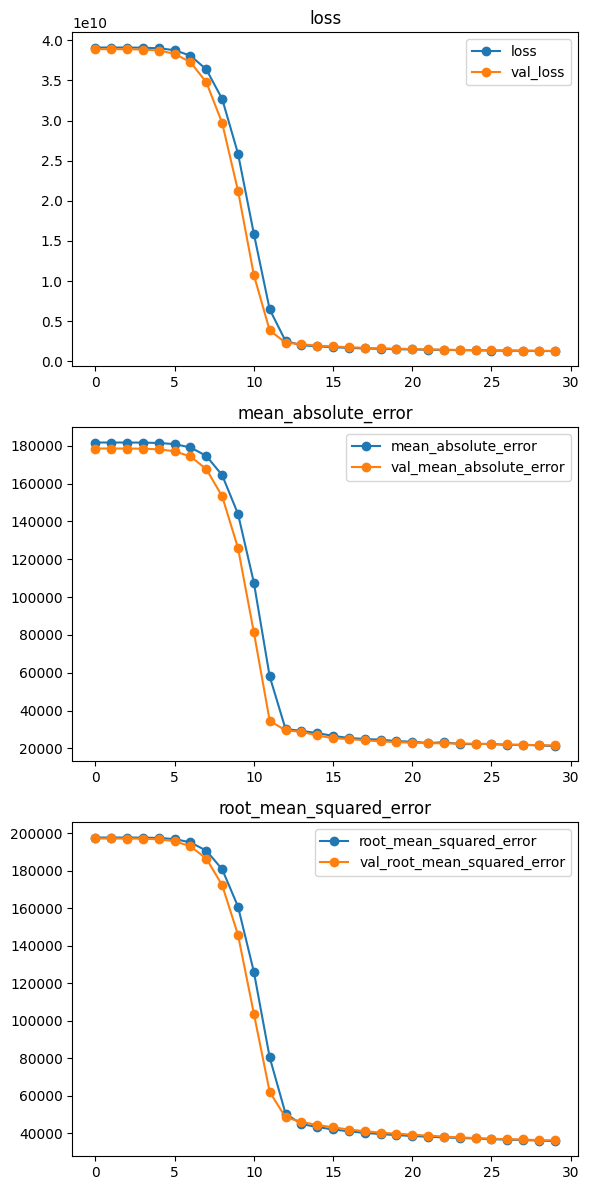

In [34]:
# Fit our model
history = model1.fit(X_train_tf, y_train,
                    validation_data = (X_test_tf, y_test),
                    epochs=30)
# plot learning
plot_history(history)

In [37]:
print(model1.evaluate(X_test_tf,y_test))
from sklearn.metrics import r2_score
y_pred = model1.predict(X_test_tf)
print(f'final R2: {r2_score(y_test, y_pred)}')

12/12 [==============================] - 0s 4ms/step - loss: 1309607680.0000 - mean_absolute_error: 21580.4746 - root_mean_squared_error: 36188.5039
[1309607680.0, 21580.474609375, 36188.50390625]
12/12 [==============================] - 0s 2ms/step
final R2: 0.8130549739855424


## This model seems good in variance. We are going to try dropout.

In [30]:
# Build regression model within function
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    model.add(Dense(20,
                activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dense(5,
                activation = 'relu'))
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dense(1, activation = 'linear'))

    # Compile Model
    model.compile(loss = 'mse', optimizer = 'adam',
             metrics=[metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])
    return model
# Call our build function to build model
model2 = build_model()

# Get model summary
model2.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 10)                2680      
                                                                 
 dense_49 (Dense)            (None, 20)                220       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_50 (Dense)            (None, 10)                210       
                                                                 
 dense_51 (Dense)            (None, 5)                 55        
                                                                 
 dense_52 (Dense)            (None, 10)                60        
                                                                 
 dropout_3 (Dropout)         (None, 10)               

Epoch 1/30
35/35 [==============================] - 2s 11ms/step - loss: 39090593792.0000 - mean_absolute_error: 181711.7344 - root_mean_squared_error: 197713.4062 - val_loss: 38884007936.0000 - val_mean_absolute_error: 178546.1562 - val_root_mean_squared_error: 197190.2812
Epoch 2/30
35/35 [==============================] - 0s 5ms/step - loss: 39088271360.0000 - mean_absolute_error: 181705.6250 - root_mean_squared_error: 197707.5469 - val_loss: 38878347264.0000 - val_mean_absolute_error: 178531.2969 - val_root_mean_squared_error: 197175.9375
Epoch 3/30
35/35 [==============================] - 0s 4ms/step - loss: 39070158848.0000 - mean_absolute_error: 181659.1562 - root_mean_squared_error: 197661.7344 - val_loss: 38836944896.0000 - val_mean_absolute_error: 178423.6562 - val_root_mean_squared_error: 197070.9062
Epoch 4/30
35/35 [==============================] - 0s 4ms/step - loss: 38955499520.0000 - mean_absolute_error: 181360.4688 - root_mean_squared_error: 197371.4688 - val_loss: 38

(<Figure size 600x1200 with 3 Axes>,
 array([<Axes: title={'center': 'loss'}>,
        <Axes: title={'center': 'mean_absolute_error'}>,
        <Axes: title={'center': 'root_mean_squared_error'}>], dtype=object))

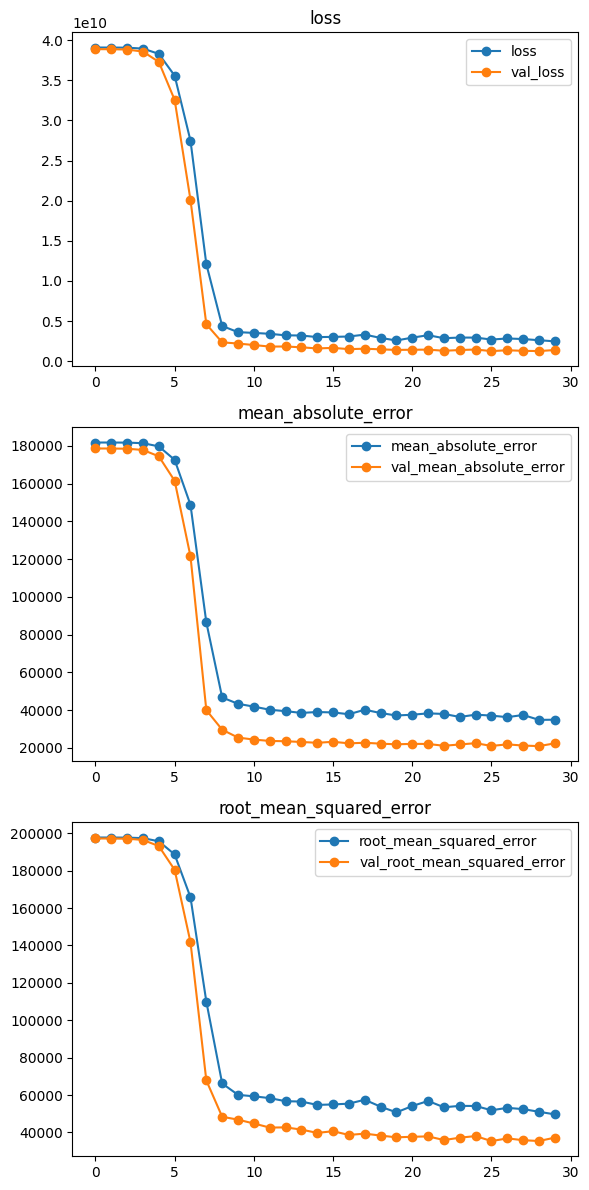

In [31]:
# Fit our model
history = model2.fit(X_train_tf, y_train,
                    validation_data = (X_test_tf, y_test),
                    epochs=30)
# plot learning
plot_history(history)

In [36]:
print(model2.evaluate(X_test_tf,y_test))
from sklearn.metrics import r2_score
y_pred = model2.predict(X_test_tf)
print(f'final R2: {r2_score(y_test, y_pred)}')

12/12 [==============================] - 0s 3ms/step - loss: 1387655936.0000 - mean_absolute_error: 22426.9434 - root_mean_squared_error: 37251.2539
[1387655936.0, 22426.943359375, 37251.25390625]
12/12 [==============================] - 0s 2ms/step
final R2: 0.8019136878804418


## This model appears to perform worse. We will experiment with additional layers and implement early stopping for further refinement.

In [38]:
# Build regression model within function
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    model.add(Dense(20,
                activation = 'relu'))
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dense(5,
                activation = 'relu'))
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dense(20,
                activation = 'relu'))
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dense(1, activation = 'linear'))

    # Compile Model
    model.compile(loss = 'mse', optimizer = 'adam',
             metrics=[metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])
    return model
# Call our build function to build model
model3 = build_model()

# Get model summary
model3.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 10)                2680      
                                                                 
 dense_63 (Dense)            (None, 20)                220       
                                                                 
 dense_64 (Dense)            (None, 10)                210       
                                                                 
 dense_65 (Dense)            (None, 5)                 55        
                                                                 
 dense_66 (Dense)            (None, 10)                60        
                                                                 
 dense_67 (Dense)            (None, 10)                110       
                                                                 
 dense_68 (Dense)            (None, 20)              

Epoch 1/30
35/35 [==============================] - 3s 15ms/step - loss: 39090728960.0000 - mean_absolute_error: 181712.1094 - root_mean_squared_error: 197713.7500 - val_loss: 38884376576.0000 - val_mean_absolute_error: 178547.1094 - val_root_mean_squared_error: 197191.2188
Epoch 2/30
35/35 [==============================] - 0s 8ms/step - loss: 39088263168.0000 - mean_absolute_error: 181705.7188 - root_mean_squared_error: 197707.5156 - val_loss: 38875316224.0000 - val_mean_absolute_error: 178522.7188 - val_root_mean_squared_error: 197168.2500
Epoch 3/30
35/35 [==============================] - 0s 9ms/step - loss: 39028011008.0000 - mean_absolute_error: 181546.9531 - root_mean_squared_error: 197555.0781 - val_loss: 38666657792.0000 - val_mean_absolute_error: 177973.4062 - val_root_mean_squared_error: 196638.3906
Epoch 4/30
35/35 [==============================] - 0s 9ms/step - loss: 37922091008.0000 - mean_absolute_error: 178684.3594 - root_mean_squared_error: 194735.9531 - val_loss: 35

(<Figure size 600x1200 with 3 Axes>,
 array([<Axes: title={'center': 'loss'}>,
        <Axes: title={'center': 'mean_absolute_error'}>,
        <Axes: title={'center': 'root_mean_squared_error'}>], dtype=object))

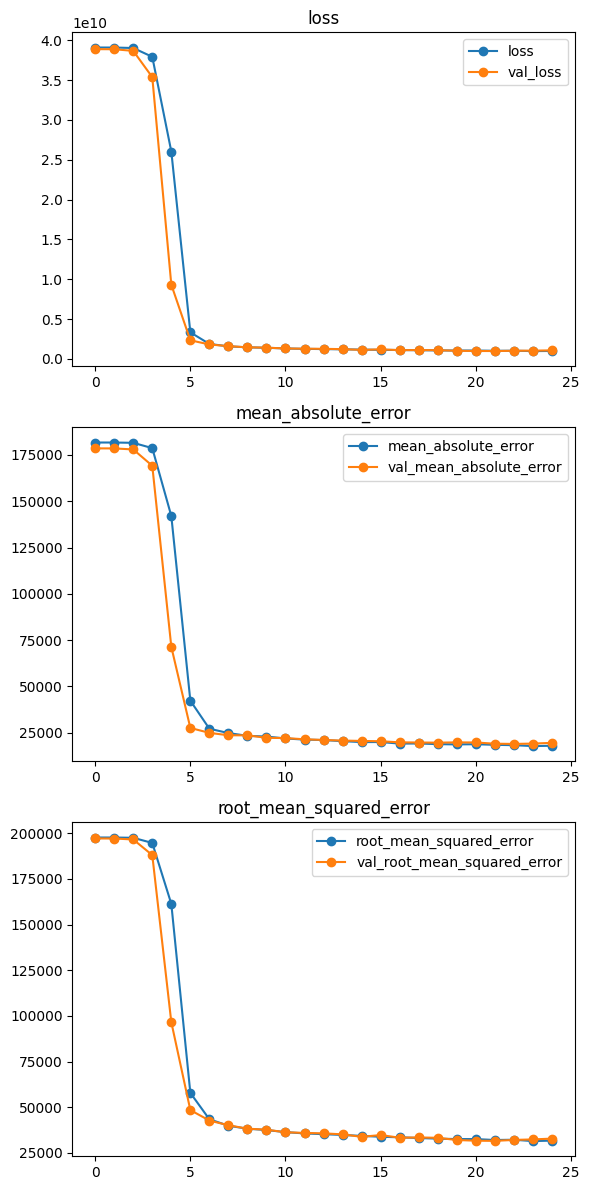

In [39]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Fit our model
history = model3.fit(X_train_tf, y_train,
                    validation_data = (X_test_tf, y_test),
                    epochs=30,callbacks = [early_stop])
# plot learning
plot_history(history)

In [40]:
print(model3.evaluate(X_test_tf,y_test))
from sklearn.metrics import r2_score
y_pred = model3.predict(X_test_tf)
print(f'final R2: {r2_score(y_test, y_pred)}')

12/12 [==============================] - 0s 5ms/step - loss: 1074172416.0000 - mean_absolute_error: 19574.0566 - root_mean_squared_error: 32774.5703
[1074172416.0, 19574.056640625, 32774.5703125]
12/12 [==============================] - 0s 3ms/step
final R2: 0.8466630690728997


## So far the best one.